**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Carmen Truong
- Rabih Siddiqui
- Lewis Weng
- Jacob Lin
- Zifan Luo

# Research Question

Do restaurants further from college/university campuses have higher or lower ratings than those that are closer? Can we determine if the reviewers of these restaurants are students and if so, do students increase or lower Yelp ratings at these restaurants?

## Background and Prior Work

Colleges and universities host many students every year and as the number of students grow business around these places also grow, some even forming college towns where businesses’ livelihoods depend on students like at UC Davis. We were curious as to specifically restaurants in the vicinity of a college or university and as students of UCSD, it follows that we were curious about restaurants around that specific area. As a restaurant’s success or profits are hard to measure and obtain, we settled on trying to see if restaurants’ ratings are affected by their vicinity to UCSD.

One article published by QSR Magazine seems to indicate so, citing data from “College & University Keynote Report” from Datassential saying that 58% of students eat off campus and 49% of students consider themselves foodies and are more conscious about what they eat.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This means that more than half of the student body is regularly eating at restaurants around their campus and reviewing and recommending those restaurants. Another study that more closely looks at customer satisfaction with food service, points out several important factors that can contribute to a restaurant’s rating such as their food quality, service quality, decor quality, and most importantly price.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) The conclusions they found is that good service and then good food were the best indicators of a high customer satisfaction. These point out significant attributes that aren’t considered in our research question, and possibly could be much greater of a factor of a restaurant’s rating than distance.

1. Baltazar, Amanda. “Restaurants Would Be Wise to Court College Students.” QSR Magazine, 7 July 2023, https://www.qsrmagazine.com/operations/business-advice/restaurants-would-be-wise-court-college-students/
2. Serhan, Mireille, and Carole Serhan. “The Impact of Food Service Attributes on Customer Satisfaction in a Rural University Campus Environment.” International Journal of Food Science, Hindawi, 31 Dec. 2019, https://www.hindawi.com/journals/ijfs/2019/2154548/

# Hypothesis


We believe that restaurants further from the university/college campuses will have similar ratings as those closer to university/college campuses. While an influx of students in the area can have an impact on nearby restaurants, we believe that this impact will be minimal and negligible. This is because students don’t make up a majority of a restaurants’ clientele, especially in more metropolitan areas. There are many other customers that either live in the area or are traveling that can give ratings to restaurants.

# Data

## Data overview


Dataset #1  
- Dataset Name: Yelp Academic Dataset
- Link to the dataset: https://www.yelp.com/dataset
- Number of observations: 6990280 reviews, 150346 businesses
- Number of variables: 9, 14

This dataset contains information on a selection of businesses, reviews, and user data centered around different metropolitan areas from the app Yelp. It is separated into 5 different json files, businesses, reviews, checkin, tip, user. We only particularly care about the businesses and reviews. For businesses, the variables we care about are the business_id, city, longitude, latitude, stars, review_count. For reviews, the variables we care about are the business_id, stars and text.

## Yelp Academic Dataset

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd

First let's load the business data into a dataframe.

In [2]:
# load business data
business = pd.read_json('https://drive.usercontent.google.com/download?id=1HGtRB3g1Hx1t1j2vPqCdTEfG-WJtTFVN&confirm=xxx', lines=True)

In [3]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Let's drop all the observations with missing values in the important columns

In [4]:
business = business.dropna(subset=['latitude', 'longitude', 'stars', 'review_count', 'categories']) # this changes nothing though

Restaurants and cafes are the businesses that we care about, so let's filter our business dataframe by category.

In [5]:
def identify_restaurants(data, keywords):
    keywords = [keyword.lower() for keyword in keywords]
    def check_categories(category):
        return any(keyword in category.lower() for keyword in keywords)
    return data[data['categories'].apply(check_categories)]

In [6]:
keywords = ['Restaurants', 'Food', 'Coffee & Tea']
business = identify_restaurants(business, keywords)
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
150328,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,1,"{'BusinessParking': '{'garage': False, 'street...","Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [7]:
business['city'].value_counts()[:30]

city
Philadelphia        7076
Tampa               3666
Indianapolis        3483
Tucson              3109
Nashville           3051
New Orleans         2808
Edmonton            2666
Saint Louis         2107
Reno                1723
Santa Barbara       1082
Boise               1079
Clearwater           832
Wilmington           732
Metairie             654
St. Louis            641
Saint Petersburg     616
Franklin             554
St. Petersburg       487
Sparks               449
Meridian             394
Brandon              394
Largo                392
Carmel               377
Cherry Hill          368
West Chester         337
Goleta               286
Kenner               282
New Port Richey      281
Greenwood            267
Fishers              266
Name: count, dtype: int64

From above we can see that the dataset has data for restaurants from many different cities. We will pick a few and find universities/colleges within to base our research around. Our initial selection was based on the top cities (with most reviews) in our dataset. However, upon further analysis, we identified that 51% of the cities in the top 29 in our dataset didn't have universities that fit our research criteria. We then refined our list to only include cities with universities in the city limits.

In [8]:
universities = pd.read_csv('./yelp_dataset/universities.csv')

In [9]:
universities = universities.set_index('City')

In [10]:
universities

,Country,State,University Name,Latitude,Longitude
City,,,,,
Philidelphia,USA,Pennsylvania,University of Pennsylvania,39.952583,-75.191975
Tucson,USA,Arizona,University of Arizona Tuscon,32.221664,-110.948922
Tampa,USA,Florida,University of South Florida,28.051836,-82.400005
Indianapolis,USA,Indiana,Purdue University,39.776709,-86.170811
Nashville,USA,Tennessee,Vanderbilt University,36.145532,-86.804060
New Orleans,USA,Louisiana,Tulane University,29.958586,-90.064997
Reno,USA,Nevada,University of Nevada,39.534642,-119.812831
Edmonton,Canada,Alberta,University of Alberta,53.523219,-113.523219
St. Louis,USA,Missouri,Washington University in St. Louis,38.628900,-90.307200


Let's also filter our business dataframe to only include businesses inside these cities.

In [11]:
business = business[business['city'].isin(universities.index)]
business['city'].value_counts()

city
Tampa            3666
Indianapolis     3483
Tucson           3109
Nashville        3051
New Orleans      2808
Edmonton         2666
Reno             1723
Santa Barbara    1082
St. Louis         641
Name: count, dtype: int64

We can then use this information on universities to calculate whether a business is close or far from a university using their latitude and longitude positions.

In [12]:
# this is a lat long distance calculator from https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128#:~:text=All%20of%20these%20can%20be,longitude%20of%20the%20two%20points

def haversine(coord1, coord2):
    import math

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0)**2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


#     print(f"Distance: {meters} m")
#     print(f"Distance: {km} km‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍")
    return km

In [13]:
def calc_distance(df):
    new_df = df.copy()
    lat, long = universities.loc[df['city'], ['Latitude', 'Longitude']]
    lat1, long1 = df[['latitude', 'longitude']]
    # threshold 10 km
    new_df['close_to_university'] = haversine((lat, long), (lat1, long1)) < 10
    return new_df

We decided to use a threshold value of 10 km. A business would be considered close to an university/college if it is within 10 km of one and far otherwise.

In [14]:
business = business.apply(calc_distance, axis=1)

Now let's create a dataframe for our reviews. There are simply too many reviews (6990280!) and the kernel cannot handle loading that many observations into memory, thus we have cut down the file using python to just the first 100000 reviews.

In [15]:
review = pd.read_json('https://drive.usercontent.google.com/download?id=1xE5dbDWd1Mp8kFQwoMmtLVj5xPq9tpuG&confirm=xxx', lines=True)

In [16]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


Again we drop observations with missing values in the important variables.

In [17]:
review.dropna(subset=['stars', 'text'])

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08


To figure out which reviews are written by college students, we queried reviews that have any mention of words related to them. To do this, we chose keywords such as student, students, college, colleges, university, universities, and uni. These keywords were chosen in the hopes that the review was written by a person who is mentioning their status as a student to be used as their way of reliability to other reviewees.

We also want to disclose concerns of using such a method. By querying reviews written by students this way, we could be counting false positives and missing false negatives. In this case, a false positive is when a review incorrectly classifies a non-student's review as a student, while a false negative is when a review incorrectly classifies a student's review as a non-student. Here are a few examples:
1. False Positive: A non-student brought up a "college" nearby.
2. False Positive: The "students" mentioned in a review could be students in highschool, not college.
3. False Positive: A non-student talks about how a restaurant is often visited by many "students"
4. False Negative: The review could have been written by a student, but the person did not mention that they were a student in their review.

In [18]:
def identify_student_reviews(data, keywords):

    keywords = [keyword.lower() for keyword in keywords]


    def check_keywords(review):

        return any(keyword in review.lower() for keyword in keywords)

    data['student_or_not'] = data['text'].apply(check_keywords)
    return data

In [19]:
keywords = ['student', 'students', 'college', 'colleges', 'university', 'universities', 'uni', "univ", "penn", "upenn", "ua", "uarizona", "usf", "purdue", "vanderbilt", "vandy", "vu", "unr", "u of a", "ualberta", "washu", "wustl", "ucsb", "uc"]
review_student = identify_student_reviews(review, keywords)

We have included some common abbreviations of the universities/colleges we are focusing our analysis around. Below are the translations:
- University of Pennsylvania
    - Penn
    - UPenn
- University of Arizona Tuscon
    - UA
    - UArizona
- University of South Florida
    - USF
- Purdue University
    - Purdue
- Vanderbilt University
    - Vanderbilt
    - Vandy
    - VU
- Tulane University
    - We could not find any informal names for Tulane University.
- University of Nevada
    - UNR
- University of Alberta
    - U of A
    - UAlberta
- Washington University in St. Louis
    - WashU
    - WUSTL
- UC Santa Barbara
    - UCSB

In [20]:
review_student.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,student_or_not
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,True
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,True
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,True
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,False
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,True


We can then inner join these two dataframe's on business_id to get a dataframe where the observations are reviews with information on if the review was written by a student and if the business the review was written for is close or far from a university/college.

In [21]:
review_businesses = pd.merge(review_student, business, how='inner', on='business_id')

Let's reduce this dataframe to the columns that we care about, namely the review rating, whether its written by a student, business' average rating, the amount of reviews that business has, and whether that business is close or far from a university/college.

In [22]:
review_businesses = review_businesses[['city', 'name', 'stars_x', 'student_or_not', 'stars_y', 'review_count', 'close_to_university']]
review_businesses = review_businesses.rename(columns={'name': 'restaurant_name', 'stars_x': 'rating', 'stars_y': 'avg_rating'})

In [23]:
review_businesses

,city,restaurant_name,rating,student_or_not,avg_rating,review_count,close_to_university
0,Tucson,Kettle Restaurant,3,True,3.5,47,True
1,Tucson,Kettle Restaurant,2,True,3.5,47,True
2,Tucson,Kettle Restaurant,5,False,3.5,47,True
3,Tucson,Kettle Restaurant,5,False,3.5,47,True
4,Tucson,Kettle Restaurant,3,False,3.5,47,True
...,...,...,...,...,...,...,...
34113,Tampa,CVS Pharmacy,4,True,2.0,18,False
34114,Edmonton,Dairy Queen Grill & Chill,1,True,2.0,6,True
34115,Tampa,Grand China,5,False,3.5,19,False
34116,Tucson,Burger King,3,False,1.5,21,True


Note there are many restaurants with the same name, however as these are different restaurants of the same chain, we have decided to keep them as the information about close or far could be different would be useful to study there. The other reason is that there are many reviews for the same restaurant so in many cases it is still referring to the same restaurant.

# Results

## Exploratory Data Analysis

Now we can use the combined reviews and businesses dataframe to answer our research question: Do restaurants further from college/university campuses have higher or lower ratings than those that are closer? Can we determine if the reviewers of these restaurants are students and if so, do students increase or lower Yelp ratings at these restaurants?

In [24]:
# import all the packages we need

import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

### Close/Far Businesses Average Rating

First lets look at the counts of restuarants that are close and restaurants that are far from an university/college.

How many businesses are close to a university?

In [25]:
review_businesses[review_businesses['close_to_university'] == True].shape[0]

27609

How many businesses are not close to a university?

In [26]:
review_businesses[review_businesses['close_to_university'] == False].shape[0]

6509

Average rating for business close to the university

In [27]:
review_businesses[review_businesses['close_to_university'] == True]['avg_rating'].mean()

3.8720525915462347

Average rating for businesses not close to the university

In [28]:
review_businesses[review_businesses['close_to_university'] == False]['avg_rating'].mean()

3.735904132739284

In [29]:
test_statistic = review_businesses[review_businesses['close_to_university'] == True]['avg_rating'].mean() - review_businesses[review_businesses['close_to_university'] == False]['avg_rating'].mean()
test_statistic

0.1361484588069506

When we compare the average ratings of restaurants close to and far from university campuses, the average ratings closer to the university are higher, but barely as their difference is less than 1. Because this difference is less than 1, we will be considering the average ratings to be similar. This similarity means that location and distance from a university does not have much impact on the average ratings of restaurants.

We'll be using this value as the test statistic to see whether this difference is observable by chance.

0.0

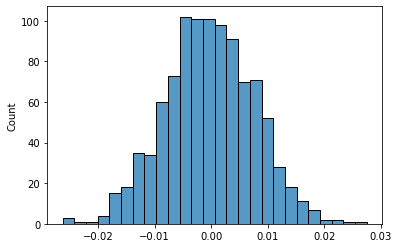

In [30]:
def permutation_tests():
    diff_array = list()
    shuffled_df = review_businesses.copy()
    for i in range (1000):
        shuffled_df['close_to_university'] = np.random.permutation(shuffled_df['close_to_university'])
        close = shuffled_df[shuffled_df['close_to_university'] == True]['avg_rating'].mean()
        not_close = shuffled_df[shuffled_df['close_to_university'] == False]['avg_rating'].mean()
        diff_array.append((close-not_close))
    return np.array(diff_array)

results = permutation_tests()
sns.histplot(results)
results.mean()
np.mean(test_statistic < results)

Since the test value is much less than 0.05, this is a statistically significant value, meaning that it is very unlikely that this relation is due to chance. However, even though it is statiscally significant, the difference between the average ratings is still very small and that means that distance doesn't have much of an impact on the overall average rating.

Lets check out the average ratings of these restaurants per university to see if we can find a difference from the above result. First lets see the number of close/far restaurants we have per university. (Note that since we only chose one university per city, the city name works as a groupby value.)

In [31]:
rb_counts = pd.DataFrame(review_businesses.groupby('city')['close_to_university'].value_counts())
rb_counts

count
city          close_to_university       
Edmonton      True                  1073
              False                  149
Indianapolis  True                  3562
              False                  458
Nashville     True                  4738
              False                  816
New Orleans   True                  9117
              False                   60
Reno          True                  3153
              False                    1
Santa Barbara False                 2250
              True                   205
St. Louis     True                   341
              False                   69
Tampa         True                  2341
              False                 2127
Tucson        True                  3079
              False                  579

For most universities/colleges in our above list, there is a big disparity between the number of restaurants that are close versus restaurants that are far. 

In [32]:
rb_avgs = pd.DataFrame(review_businesses.groupby(['city', 'close_to_university'])['avg_rating'].mean())
rb_avgs

avg_rating
city          close_to_university            
Edmonton      False                  3.298658
              True                   3.700839
Indianapolis  False                  3.657205
              True                   3.907777
Nashville     False                  3.329657
              True                   3.808147
New Orleans   False                  3.908333
              True                   3.965010
Reno          False                  4.000000
              True                   3.805423
Santa Barbara False                  3.931333
              True                   4.243902
St. Louis     False                  3.782609
              True                   3.590909
Tampa         False                  3.738834
              True                   3.823580
Tucson        False                  3.689119
              True                   3.824943

For most universities/colleges above, it seems that restuarants that are further from the university/college are recieving lower ratings on average than restaurants that are close.

### Linear Regression on Distance versus Ratings
We can perform linear regression to see if distance from a chosen university is a predictor for Yelp ratings.

First let's create a new column for our dataframe that contains the distance from a university/college. We can adapt our calc_distance function from before to calculate distance by removing the threshold check. 

In [33]:
def calc_distance(df):
    new_df = df.copy()
    lat, long = universities.loc[df['city'], ['Latitude', 'Longitude']]
    lat1, long1 = df[['latitude', 'longitude']]
    new_df['distance'] = haversine((lat, long), (lat1, long1))
    return new_df

In [34]:
business_lg = business.apply(calc_distance, axis=1)

In [35]:
business_lg

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,close_to_university,distance
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True,4.010
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",True,4.958
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",True,2.859
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Steakhouses, Asian Fusion, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",False,13.126
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",True,4.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",False,12.240
150315,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,1,"{'RestaurantsPriceRange2': '3', 'DogsAllowed':...","Health Markets, Specialty Food, Food, Grocery","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '...",True,5.064
150321,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227,39.638245,-86.128069,4.0,29,1,"{'RestaurantsPriceRange2': '1', 'Caters': 'Fal...","Food, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",True,4.864
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...",True,3.088


In [36]:
review_business_lg = pd.merge(review_student, business_lg, how='inner', on='business_id')
review_business_lg = review_business_lg[['city', 'name', 'stars_x', 'student_or_not', 'stars_y', 'review_count', 'close_to_university', 'distance']]
review_business_lg = review_business_lg.rename(columns={'name': 'restaurant_name', 'stars_x': 'rating', 'stars_y': 'avg_rating'})

Let's check the distribution on distances.

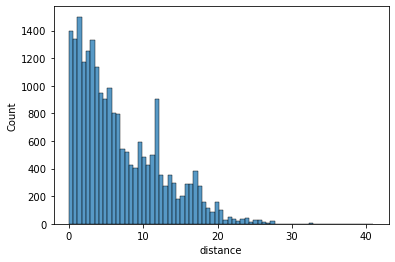

In [37]:
sns.histplot(data=business_lg['distance'])

f1 = plt.gcf()

It looks like there's an outlier, lets remove it and check the distribution again.

In [38]:
business_lg = business_lg.drop(business_lg['distance'].idxmax())

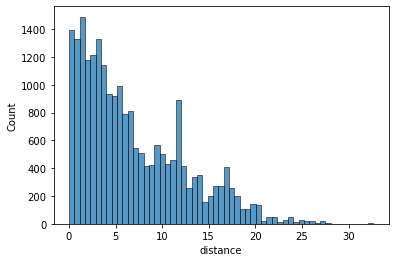

In [39]:
sns.histplot(data=business_lg['distance'])
f1 = plt.gcf()

Let's check the scatterplot to see if we can spot a linear relation between the Yelp ratings of restaurants and the distance they are from a university/college.

<AxesSubplot:xlabel='distance', ylabel='rating'>

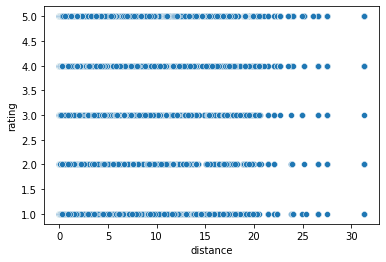

In [40]:
sns.scatterplot(data=review_business_lg, y='rating', x='distance')

<AxesSubplot:xlabel='distance', ylabel='avg_rating'>

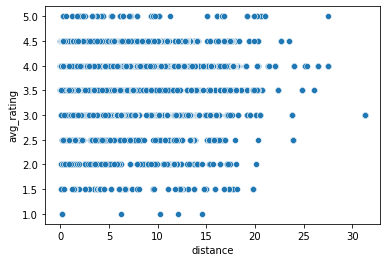

In [41]:
sns.scatterplot(data=review_business_lg, x='distance', y='avg_rating')

From the scatterplot there seems to be no relation between Yelp ratings and distance as there is about the same amount of low and high ratings for restaurants of all distances from an university/college. (Note that the scatterplot looks like this because the Yelp ratings are at hard intervals) If we were to draw a line between these points it should look flat. Lets check using linear regression. 

In [42]:
outcome, predictors = patsy.dmatrices('rating ~ distance', review_business_lg)
mod = sm.OLS(outcome, predictors)
res_1 = mod.fit()

In [43]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     37.03
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.18e-09
Time:                        22:37:46   Log-Likelihood:                -57164.
No. Observations:               34118   AIC:                         1.143e+05
Df Residuals:                   34116   BIC:                         1.143e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9302      0.010    409.997      0.0

In [44]:
outcome_2, predictors_2 = patsy.dmatrices('avg_rating ~ distance', review_business_lg)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [45]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           8.98e-79
Time:                        22:37:46   Log-Likelihood:                -28703.
No. Observations:               34118   AIC:                         5.741e+04
Df Residuals:                   34116   BIC:                         5.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8997      0.004    936.864      0.0

In both linear regressions, the first trying to predict review rating, and the second trying to predict a restaurant's average rating, both using distance, we see a low pvalue in the distance row meaning that it is statistically significant and likely nonzero. However the coefficient for distance is still very small, despite the value being statistically significant so distance doesn't have much of an effect on reveiw rating or average rating.

However, it might be the case for the average ratings, that because there are many repeated values, it could affect the model. Lets revert back to just the business_lg dataframe and run linear regression using that.

In [46]:
outcome_3, predictors_3 = patsy.dmatrices('stars ~ distance', business_lg)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [47]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     110.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           9.40e-26
Time:                        22:37:47   Log-Likelihood:                -27833.
No. Observations:               22228   AIC:                         5.567e+04
Df Residuals:                   22226   BIC:                         5.569e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6841      0.009    409.390      0.0

Again we see a pvalue of 0! This means that we are pretty confidant in our coefficient. However, the coefficient for distance is -0.0014, a value that is pretty much 0. So even in the case that we are confident, distance barely affects the Yelp rating of a restaurant (when we work in a scale of 0.5, changes on a scale of 0.0014 don't really matter).

Lets check these coefficients per university to see if this is different for some specific universities.

In [48]:
# do linear regression per city, since we only picked one university/college per city
for city in review_business_lg['city'].unique():
    out, pred = patsy.dmatrices('avg_rating ~ distance', review_business_lg[review_business_lg['city']==city])
    mod = sm.OLS(out, pred)
    res = mod.fit()
    print(city, 'distance coef, pvalue:', res.params[1], res.pvalues[1])

Tucson distance coef, pvalue: -0.019297257838514253 1.3378881822057937e-22
New Orleans distance coef, pvalue: -5.40689959393364e-05 0.9829791530162886
Santa Barbara distance coef, pvalue: -0.021013176419007823 5.377141711223726e-12
Indianapolis distance coef, pvalue: -0.02531903507411698 9.582775170794422e-30
Tampa distance coef, pvalue: -0.0007122323006440532 0.6443888415724309
Nashville distance coef, pvalue: -0.03630916199604715 5.952040038289835e-110
Reno distance coef, pvalue: -0.05708464796143796 2.2607251298270868e-48
Edmonton distance coef, pvalue: -0.03956259251288145 6.412533236474616e-13
St. Louis distance coef, pvalue: 0.042701626185729084 0.0024399317564765054


In [49]:
for city in business_lg['city'].unique():
    out, pred = patsy.dmatrices('stars ~ distance', business_lg[business_lg['city']==city])
    mod = sm.OLS(out, pred)
    res = mod.fit()
    print(city, 'distance coef, pvalue:', res.params[1], res.pvalues[1])

Nashville distance coef, pvalue: -0.023335090751614836 1.1940904313840977e-13
Indianapolis distance coef, pvalue: -0.02765639050401021 7.062729337080153e-24
Edmonton distance coef, pvalue: -0.022508090518256942 1.7801730287950445e-09
Reno distance coef, pvalue: -0.030840247256741546 7.516556988980532e-07
Tucson distance coef, pvalue: -0.016454627634822326 5.849920130597601e-09
Tampa distance coef, pvalue: -0.006147727979292611 0.014804146971322766
Santa Barbara distance coef, pvalue: 0.03418387619754808 2.1642130947009107e-07
New Orleans distance coef, pvalue: -0.016771392783652177 0.00040453348244224555
St. Louis distance coef, pvalue: 0.005871954129986789 0.527981763953219


Even separated among specific universities/colleges, we see mostly the same results. It is dominated by the fact that the coefficient for distance is still extremely small, thus distance doesn't have much of an effect on rating.

### Student vs Non-student Reviews

Ultimately, we want to determine how students from these campuses impact these restaurants, i.e. do they increase or decrease restaurant's Yelp ratings? Let's start by checking the reviews of the restaurants that are close. How many are of these reviews are from students and how many are from non students?

In [50]:
close_reviews=review_businesses[review_businesses['close_to_university'] == True]
is_student=close_reviews[close_reviews['student_or_not']==True].shape[0]
print(is_student,'of the reviews of restaurants that are close to campus are from students')
not_student=close_reviews[close_reviews['student_or_not']==False].shape[0]
print(not_student, 'of the reviews of restaurants that are close to campus are not from students')

12410 of the reviews of restaurants that are close to campus are from students
15199 of the reviews of restaurants that are close to campus are not from students


What is the average Yelp rating among the reviews from students? What is the average Yelp rating among the reviews from non students?

In [51]:
avg_rating_student=close_reviews[close_reviews['student_or_not']==True]['avg_rating'].mean()
print(avg_rating_student,'is the average Yelp rating among the reviews from students')
avg_rating_nonstudent=close_reviews[close_reviews['student_or_not']==False]['avg_rating'].mean()
print(avg_rating_nonstudent,' is the average Yelp rating among the reviews from non students')

3.853303787268332 is the average Yelp rating among the reviews from students
3.887361010592802  is the average Yelp rating among the reviews from non students


According to the previous calculation, we can see that the average ratings from non-students is slightly higher than the average ratings from non-students(the difference is smaller than 1).  In order to further compare between the mean ratings of reviews from students and non-students, we decided to perform a permutation test to assess the statistical significance of the difference. The test statistic in this permutation test would be the difference in the average ratings between students and non-students from our dataset.

In [57]:
test_statistic = review_businesses[review_businesses['student_or_not'] == False]['avg_rating'].mean() - review_businesses[review_businesses['student_or_not'] == True]['avg_rating'].mean()
test_statistic

0.02865648751900851

By comparing the original test statistic to the distribution of the test statistics from the permuted samples, we can determine how extreme the original difference is.

0.0

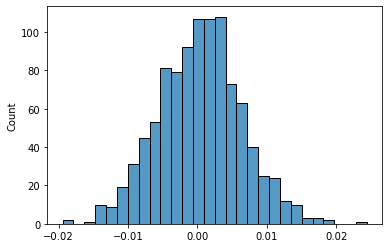

In [53]:
def permutation_tests():
    diff_array = list()
    shuffled_df = review_businesses.copy()
    for i in range (1000):
        shuffled_df['student_or_not'] = np.random.permutation(shuffled_df['student_or_not'])
        student = shuffled_df[shuffled_df['student_or_not'] == True]['avg_rating'].mean()
        nonstudent = shuffled_df[shuffled_df['student_or_not'] == False]['avg_rating'].mean()
        diff_array.append((nonstudent-student))
    return np.array(diff_array)

results = permutation_tests()
sns.histplot(results)
results.mean()
np.mean(test_statistic <= results)

The p-value from the permutation test is 0.001 which is way below the 0.05/0.01 significance level. Therefore, we can conclude that  the difference in means between average ratings from student and non-student reviews is statistically significant, meaning that it's unlikely the observed difference occurred by random chance. However, the difference could be statistically significant but still small or unimportant in practical terms given the difference of observed ratings between the two groups is very small (or almost negligible).

We can again split the analysis of reviews up by university to see if some universities have different results from others. 

In [54]:
city_to_university = universities['University Name'].to_dict()

review_businesses['university_name'] = review_businesses['city'].map(city_to_university)

review_businesses

,city,restaurant_name,rating,student_or_not,avg_rating,review_count,close_to_university,university_name
0,Tucson,Kettle Restaurant,3,True,3.5,47,True,University of Arizona Tuscon
1,Tucson,Kettle Restaurant,2,True,3.5,47,True,University of Arizona Tuscon
2,Tucson,Kettle Restaurant,5,False,3.5,47,True,University of Arizona Tuscon
3,Tucson,Kettle Restaurant,5,False,3.5,47,True,University of Arizona Tuscon
4,Tucson,Kettle Restaurant,3,False,3.5,47,True,University of Arizona Tuscon
...,...,...,...,...,...,...,...,...
34113,Tampa,CVS Pharmacy,4,True,2.0,18,False,University of South Florida
34114,Edmonton,Dairy Queen Grill & Chill,1,True,2.0,6,True,University of Alberta
34115,Tampa,Grand China,5,False,3.5,19,False,University of South Florida
34116,Tucson,Burger King,3,False,1.5,21,True,University of Arizona Tuscon


In [55]:
university_city_groups = review_businesses.groupby(['university_name', 'city'])

university_city_averages = []

for (university, city), group in university_city_groups:
    avg_rating_students = group[group['student_or_not'] == True]['rating'].mean()
    avg_rating_nonstudents = group[group['student_or_not'] == False]['rating'].mean()
    
    university_city_averages.append({
        'University Name': university,
        'City': city,
        'Average Rating from Students': avg_rating_students,
        'Average Rating from Non-Students': avg_rating_nonstudents
    })

summary_table = pd.DataFrame(university_city_averages)

summary_table

,University Name,City,Average Rating from Students,Average Rating from Non-Students
0,Purdue University,Indianapolis,3.875936,3.917674
1,Tulane University,New Orleans,3.888860,4.091659
2,UC Santa Barbara,Santa Barbara,3.906832,4.124916
3,University of Alberta,Edmonton,3.664286,3.718391
4,University of Arizona Tuscon,Tucson,3.850599,3.894070
5,University of Nevada,Reno,3.763785,3.980684
6,University of South Florida,Tampa,3.689155,3.901905
7,Vanderbilt University,Nashville,3.597990,3.894820
8,Washington University in St. Louis,St. Louis,3.696517,3.679426


Just from looking at these averages, it seems that non students give on average higher ratings to restaurants than students.

# Ethics & Privacy

We need inclusive data representation, by ensuring the dataset adequately represents different types of restaurants and doesn’t exclude any significant group. We must ensure that the data sources that we use comply with ethical standards and privacy laws. The data should be publicly available and not include any personal information about individuals who submitted the ratings. We must review the data and results to monitor for biases.

The data on Yelp and Google Maps is self-uploaded, so some restaurants may not appear. Since the data is self-uploaded, we believe the restaurants would be open to having other people see it. The restaurants are self-uploaded. After a restaurant is uploaded, they cannot be taken down unless the restaurant has closed down. Since closed restaurants do not show up, the data could be biased. For instance, restaurants that have closed down could potentially have lower ratings, but these lower ratings are no longer part of the data. Another bias could be with online reviews in general. Restaurants could encourage positive reviews by offering a discount or a free dessert to customers. Another concern is that people who have a negative experience might feel frustrated and post negative reviews while a person who has a great experience has no problems, so they also don’t feel the need to make a review. Negative reviews may be overrepresented. 

We must develop a methodology that addresses these issues, such as figuring out how we are going to include each level of budget, restaurant type, etc. We have to be sure to exclude personal identifiers (such as names) for those who submitted reviews. We also have to make sure to remove the reviewer’s names. We will include restaurants in the main price categories and all cuisines that are ordered to avoid bias.

# Team Expectations 

* Team members are expected to attend regular discord meetings, contribute ideas and actively participate in project discussions.
* Team members should be communicative and complete their assigned works by the agreed-upon deadlines.
* Team members should provide feedback to each other’s work in a respectful manner.

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date | Meeting Time     | Completed Before Meeting                                    | Discuss at Meeting                                           |
|--------------|------------------|--------------------------------------------------------------|--------------------------------------------------------------|
| 2/10         | 7 PM             | Read & Think about COGS 108 expectations; brainstorm topics/questions | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research |
| 2/11         | 7 PM             | Finalize proposal                                           | Discuss ideal dataset(s) and ethics; discuss and submit project proposal  |
| 2/16         | 4:15 PM          | Edit, finalize, and submit proposal; Search for datasets    | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part |
| 2/23         | 4:15 PM          | Finalize information for Checkpoint #1                      | Review/Edit wrangling/EDA; Discuss Analysis Plan             |
| 3/1          | 4:15 PM          | Finalize wrangling/EDA; Begin Analysis                      | Discuss/edit Analysis; Complete project check-in            |
| 3/8          | 4:15 PM          | Complete analysis; Draft results/conclusion/discussion      | Discuss/edit full project for Checkpoint #2 Discuss video ideas and filming methods |
| 3/16         | 4:15 PM          | Check team progress                                         | Talk about progress on the video and documentation for the final project |
| 3/20         | Before 11:59 PM  | Finalize Project                                            | Turn in Final Project, Video, & Group Project Surveys       |